# 数据分析实操专题练习答案-Pandas
---

## 数据预处理与可视化

### 数据描述

[餐饮订单数据](data/data_desc.htm)分为三个数据文件，分别为：

- 用户表（users.xlsx）
- 菜品订单表（meal_order_info.csv）
- 菜品订单详情表（meal_order_detail.xlsx）


### 题目要求

请使用**pandas**编程完成以下操作任务。【注：只能使用matplotlib绘制图表，禁止使用第三方绘图包】

#### 第1题（难易程度：* ）

分别导入上述数据文件（对于包含多个sheet页的Excel数据表，只需导入第1个sheet页），完成以下操作：

1. 输出每个数据表的行数和列数

In [262]:
# 操作代码
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

dir(warnings)
warnings.filterwarnings('ignore')

In [47]:
# 读取用户表
users = pd.read_excel('data/users.xlsx')
users.shape

(734, 37)

In [48]:
# 读取订单信息表
orders = pd.read_csv('data/meal_order_info.csv', encoding='gbk')
orders.shape

(945, 21)

In [49]:
# 读取订单详情表
order_details = pd.read_excel('data/meal_order_detail.xlsx')
order_details.shape

(2779, 19)

2. 输出订单详情表菜品销量（counts和amounts列）的描述性统计


In [50]:
order_details[['counts', 'amounts']].describe()

,counts,amounts
count,2779.000000,2779.000000
mean,1.111191,45.337172
std,0.625428,36.808550
min,1.000000,1.000000
25%,1.000000,25.000000
50%,1.000000,35.000000
75%,1.000000,56.000000
max,10.000000,178.000000


3. 输出订单信息表订单编号与菜品名称（order_id和dishes_name列）的描述性统计

In [51]:
order_details['order_id'] = order_details['order_id'].astype('category')
order_details['dishes_name'] = order_details['dishes_name'].astype('category')

order_details[['order_id', 'dishes_name']].describe()

,order_id,dishes_name
count,2779,2779
unique,278,154
top,392,白饭/大碗
freq,24,92


#### 第2题 （难易程度：* ）

在第1题操作的基础上，完成以下操作：

1. 剔除三个表中全为空值或者所有元素取值相同的列，并将修改后的表分别保存为"users-01.csv","orders-01.csv"和"order-details-01.csv"文件；

In [52]:
# 操作代码

def dropnasv_cols(df):
    '''删除全空列和所有元素取值相同的列'''
    
    print('删除前：', df.shape)
    num_cols = df.shape[1]

    # 删除全空列
    df.dropna(axis=1, how='all', inplace=True)

    # 删除所有元素取值相同的列
    all_same_cols = df.describe().loc['std'] == 0 
    all_same_cols = all_same_cols.index[all_same_cols]
    df.drop(all_same_cols, axis=1, inplace=True)

    print('删除后：', df.shape)
    print('删除列数：', num_cols - df.shape[1])

In [53]:
# 删除用户表全空或者所有元素取值相同的列
dropnasv_cols(users)
# 保存用户表
users.to_csv('users-01.csv')

删除前： (734, 37)
删除后： (734, 24)
删除列数： 13


In [54]:
# 删除订单信息表全空或者所有元素取值相同的列
dropnasv_cols(orders)
# 保存订单信息表
orders.to_csv('orders-01.csv')

删除前： (945, 21)
删除后： (945, 14)
删除列数： 7


In [55]:
# 删除订单详情表全空或者所有元素取值相同的列
dropnasv_cols(order_details)
# 保存订单详情表
order_details.to_csv('order-details-01.csv')

删除前： (2779, 19)
删除后： (2779, 9)
删除列数： 10


2. 使用matplotlib绘制用户表、订单信息表和订单详情表中缺失值的热图；

In [56]:
# 定义热图绘制函数
def plot_heatmap(data, ax, cmap='Reds_r'):
    xlabels = data.columns.values    
    X = data.values
    
    ax.imshow(X, aspect='auto', cmap=cmap)
    ax.set_xticklabels(xlabels, rotation='vertical')
    ax.set_xticks(range(len(xlabels)))
    for k in ax.spines:
        ax.spines[k].set_visible(False)

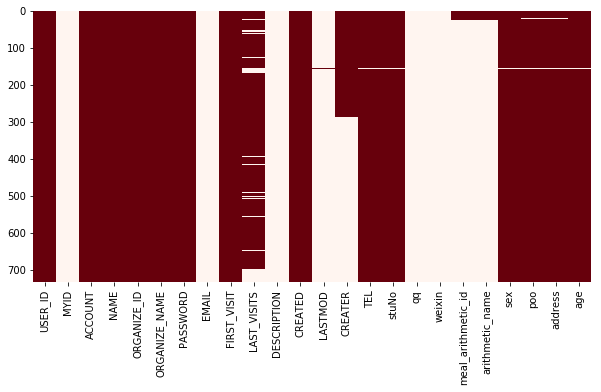

In [57]:
# 绘制用户表缺失值的热图
plt.figure(figsize=(10, 5))
plot_heatmap(users.isna(), plt.gca())
plt.show()

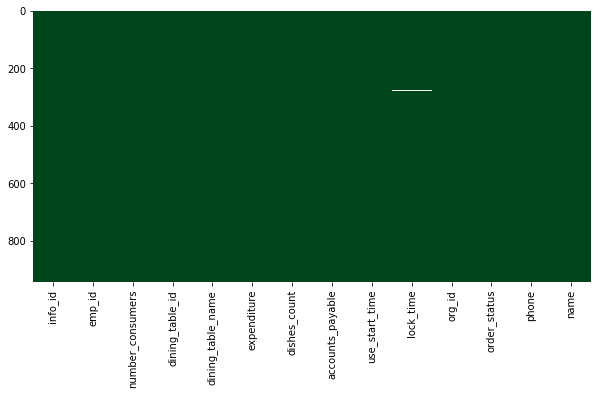

In [58]:
# 绘制订单信息表缺失值的热图
plt.figure(figsize=(10, 5))
plot_heatmap(orders.isna(), plt.gca(), cmap='Greens_r')
plt.show()

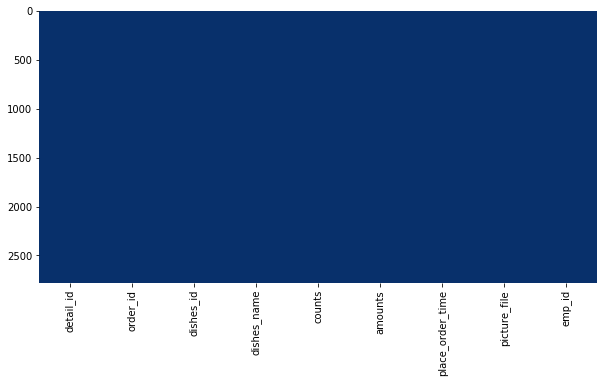

In [59]:
# 绘制订单详情表缺失值的热图
plt.figure(figsize=(10, 5))
plot_heatmap(order_details.isna(), plt.gca(), cmap='Blues_r')
plt.show()

3. 删除三个表中缺失值占比超过99%的列。

In [60]:
# 定义根据缺失值占比删除列的函数
def dropna_percent(df, percentage):    
    print('删除前：', df.shape)
    num_cols = df.shape[1]
    
    thresh = int((1 - percentage) * len(df))
    df.dropna(axis=1, thresh=thresh, inplace=True)
    
    print('删除后：', df.shape)
    print('删除列数：', num_cols - df.shape[1])

In [61]:
# 删除用户表缺失值占比超过90%的列
dropna_percent(users, 0.90)

删除前： (734, 24)
删除后： (734, 16)
删除列数： 8


In [62]:
# 删除订单信息表缺失值占比超过90%的列
dropna_percent(orders, 0.90)

删除前： (945, 14)
删除后： (945, 14)
删除列数： 0


In [63]:
# 删除订单详情表缺失值占比超过90%的列
dropna_percent(order_details, 0.90)

删除前： (2779, 9)
删除后： (2779, 9)
删除列数： 0


#### 第3题（难易程度：* ）

在第2题操作的基础上，完成以下操作：

1. 对用户表进行反向和前向缺失值填充；

In [64]:
# 操作代码
users.fillna(method='bfill', inplace=True)
users.fillna(method='ffill', inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 16 columns):
USER_ID          734 non-null int64
ACCOUNT          734 non-null object
NAME             734 non-null object
ORGANIZE_ID      734 non-null int64
ORGANIZE_NAME    734 non-null object
PASSWORD         734 non-null object
FIRST_VISIT      734 non-null datetime64[ns]
LAST_VISITS      734 non-null datetime64[ns]
CREATED          734 non-null datetime64[ns]
CREATER          734 non-null float64
TEL              734 non-null float64
stuNo            734 non-null object
sex              734 non-null object
poo              734 non-null object
address          734 non-null object
age              734 non-null float64
dtypes: datetime64[ns](3), float64(3), int64(2), object(8)
memory usage: 91.8+ KB


2. 对订单信息表使用**use_start_time**列的非空值填充**lock_time**列对应行的缺失值；

In [65]:
# 操作代码
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 14 columns):
info_id              945 non-null int64
emp_id               945 non-null int64
number_consumers     945 non-null int64
dining_table_id      945 non-null int64
dining_table_name    945 non-null int64
expenditure          945 non-null int64
dishes_count         945 non-null int64
accounts_payable     945 non-null int64
use_start_time       945 non-null object
lock_time            936 non-null object
org_id               945 non-null int64
order_status         945 non-null int64
phone                945 non-null int64
name                 945 non-null object
dtypes: int64(11), object(3)
memory usage: 103.4+ KB


In [66]:
# 操作代码
na_rows = orders['lock_time'].isna()
orders.loc[na_rows, 'lock_time'] = orders[na_rows]['use_start_time']
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 14 columns):
info_id              945 non-null int64
emp_id               945 non-null int64
number_consumers     945 non-null int64
dining_table_id      945 non-null int64
dining_table_name    945 non-null int64
expenditure          945 non-null int64
dishes_count         945 non-null int64
accounts_payable     945 non-null int64
use_start_time       945 non-null object
lock_time            945 non-null object
org_id               945 non-null int64
order_status         945 non-null int64
phone                945 non-null int64
name                 945 non-null object
dtypes: int64(11), object(3)
memory usage: 103.4+ KB


3. 使用matplotlib绘制缺失值删除和填充后三个表的缺失值热图。

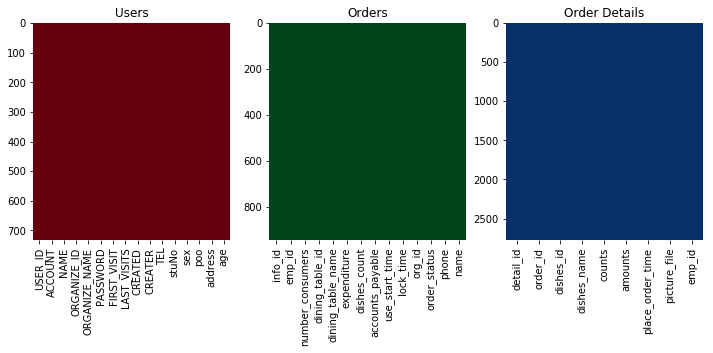

In [67]:
# 可视化上述三个表的缺失值删除和填充的结果
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot_heatmap(users.isna(), ax=ax1, cmap='Reds_r')
plot_heatmap(orders.isna(), ax=ax2, cmap='Greens_r')
plot_heatmap(order_details.isna(), ax=ax3, cmap='Blues_r')

ax1.set_title('Users')
ax2.set_title('Orders')
ax3.set_title('Order Details')
plt.show()

#### 第4题 （难易程度：* ）

在第3题操作的基础上，完成以下操作：

1. 将订单信息表开始时间（use_start_time）和锁单时间（lock_time）列由字符串转换为时间类型；

In [68]:
# 操作代码
orders['use_start_time'] = pd.to_datetime(orders['use_start_time'])
orders['lock_time'] = pd.to_datetime(orders['lock_time'])
orders[['use_start_time', 'lock_time']].dtypes

use_start_time    datetime64[ns]
lock_time         datetime64[ns]
dtype: object

2. 提取类型转换后锁单时间（lock_time）列的年（year）、月（month）、日（day）、周（week）、星期（weekday)和星期名（weekname），并分别输出其前5条和后5条；

In [69]:
years = [dt.year for dt in orders['lock_time']]
print('年份（前5条）:', years[:5])
print('年份（后5条）:', years[-5:])
months = [dt.month for dt in orders['lock_time']]
print('月份（前5条）:', months[:5])
print('月份（后5条）:', months[-5:])
days = [dt.day for dt in orders['lock_time']]
print('日期（前5条）:', days[:5])
print('日期（后5条）:', days[-5:])
weekdays = [dt.weekday() for dt in orders['lock_time']]
print('星期（前5条）:', weekdays[:5])
print('星期（后5条）:', weekdays[-5:])
weekday_names = [dt.day_name() for dt in orders['lock_time']]
print('星期名（前5条）:', weekday_names[:5])
print('星期名（后5条）:', weekday_names[-5:])

年份（前5条）: [2016, 2016, 2016, 2016, 2016]
年份（后5条）: [2016, 2016, 2016, 2016, 2016]
月份（前5条）: [8, 8, 8, 8, 8]
月份（后5条）: [8, 8, 8, 8, 8]
日期（前5条）: [1, 1, 1, 1, 1]
日期（后5条）: [31, 31, 31, 31, 31]
星期（前5条）: [0, 0, 0, 0, 0]
星期（后5条）: [2, 2, 2, 2, 2]
星期名（前5条）: ['Monday', 'Monday', 'Monday', 'Monday', 'Monday']
星期名（后5条）: ['Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday']


3. 输出订单信息表的下列时间统计信息【点餐时间=锁单时间（lock_time) - 开始时间（use_start_time）】：
   - 订单最早时间
   - 订单最晚时间
   - 平均点餐时间
   - 最短点餐时间
   - 最长点餐时间

In [70]:
print('最早锁单时间:', orders['lock_time'].min())
print('最晚锁单时间:', orders['lock_time'].max())

print('平均点餐时间:', (orders['lock_time'] - orders['use_start_time']).mean())
print('最短点餐时间:', (orders['lock_time'] - orders['use_start_time']).min())
print('最长点餐时间:', (orders['lock_time'] - orders['use_start_time']).max())

最早锁单时间: 2016-08-01 11:11:46
最晚锁单时间: 2016-08-31 21:56:12
平均点餐时间: 0 days 01:11:29.085714
最短点餐时间: -1 days +00:05:03
最长点餐时间: 16 days 00:08:00


#### 第5题 （难易程度：**）

在第4题操作的基础上，完成以下操作：

1. 找出订单信息表锁单时间（lock_time）的异常值（点餐时间小于10秒或者大于1天的值）；

In [71]:
# 操作代码
min_delta = pd.Timedelta(seconds=10)
max_delta = pd.Timedelta(days=1)

outlier_rows = orders['lock_time'] - orders['use_start_time'] <= min_delta
outlier_rows = outlier_rows | (orders['lock_time'] - orders['use_start_time'] >= max_delta)

orders['lock_time'][outlier_rows]

16    2016-08-01 19:40:00
82    2016-08-21 19:26:52
106   2016-08-06 13:18:18
114   2016-08-06 17:33:05
115   2016-08-06 17:20:46
118   2016-08-06 17:34:27
128   2016-08-06 18:36:12
132   2016-08-06 19:06:01
170   2016-08-07 11:07:23
188   2016-08-07 17:20:56
197   2016-08-07 18:46:07
215   2016-08-07 20:26:42
220   2016-08-07 21:28:59
242   2016-08-09 11:07:00
279   2016-08-11 11:47:00
303   2016-08-21 18:26:19
321   2016-08-13 11:30:31
429   2016-08-14 20:27:22
433   2016-08-14 21:09:41
438   2016-08-14 21:37:00
439   2016-08-14 21:16:06
513   2016-08-21 12:40:26
518   2016-08-21 18:48:41
526   2016-08-21 21:07:41
527   2016-08-29 21:10:34
546   2016-08-20 12:21:05
551   2016-08-20 12:19:12
560   2016-08-19 13:55:56
567   2016-08-20 17:26:48
621   2016-08-21 12:54:05
625   2016-08-21 13:40:32
632   2016-08-21 17:16:00
657   2016-08-21 19:41:00
785   2016-08-27 17:14:48
806   2016-08-27 19:19:12
828   2016-08-27 21:50:01
843   2016-08-28 12:09:07
896   2016-08-28 21:09:50
931   2016-0

2. 将锁单时间（lock_time）的异常值替换为对应行的开始时间（use_start_time）加上平均点餐时间；

In [72]:
mean_order_timedelta = (orders['lock_time'] - orders['use_start_time']).mean()
orders.loc[outlier_rows, 'lock_time'] = orders.loc[outlier_rows, 'use_start_time'] + mean_order_timedelta
orders.loc[outlier_rows, ['use_start_time','lock_time']]

,use_start_time,lock_time
16,2016-08-01 19:40:00,2016-08-01 20:51:29.085714285
82,2016-08-05 19:18:52,2016-08-05 20:30:21.085714285
106,2016-08-06 13:45:18,2016-08-06 14:56:47.085714285
114,2016-08-06 17:33:05,2016-08-06 18:44:34.085714285
115,2016-08-06 17:35:46,2016-08-06 18:47:15.085714285
118,2016-08-06 17:48:27,2016-08-06 18:59:56.085714285
128,2016-08-06 18:50:12,2016-08-06 20:01:41.085714285
132,2016-08-06 19:06:14,2016-08-06 20:17:43.085714285
170,2016-08-07 11:45:23,2016-08-07 12:56:52.085714285
188,2016-08-07 17:58:56,2016-08-07 19:10:25.085714285


3. 将上述异常值处理后的订单信息表存储为"orders-05.csv"文件。

In [73]:
orders.to_csv('orders-05.csv')

#### 第6题 （难易程度：**）

在第5题操作的基础上，完成以下操作：

1. 按照点餐时间（place_order_time）的日期对订单详情表的订单数量进行分组；

In [87]:
# 操作代码
order_details['place_order_time'] = pd.to_datetime(order_details['place_order_time'])
order_details['date'] = [dt.date() for dt in order_details['place_order_time']]
order_detail_groups = order_details[['date', 'counts', 'amounts']].groupby(by='date')
order_detail_groups.size()

date
2016-08-01    217
2016-08-02    138
2016-08-03    157
2016-08-04    144
2016-08-05    193
2016-08-06    706
2016-08-07    696
2016-08-08    160
2016-08-09    146
2016-08-10    222
dtype: int64

2. 绘制第一周（2016-08-01至2016-08-07）订单数量的柱状图，其中标题为"2016年8月第1周订单数量",横坐标为精确到天的日期，纵坐标为订单数量；

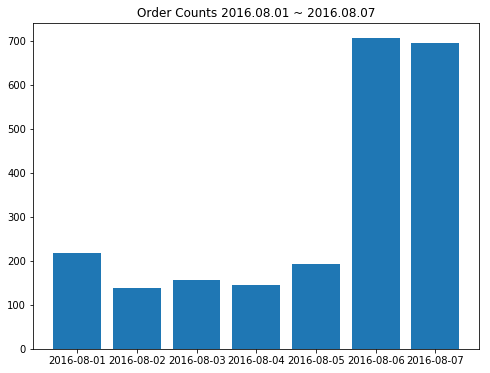

In [118]:
plt.figure(figsize=(8, 6))
x = order_detail_groups.size()[:7].index.values
y = order_detail_groups.size()[:7].values
plt.bar(x, y)
plt.title('Order Counts 2016.08.01 ~ 2016.08.07')
plt.show()

3. 计算订单详情表单日销售金额的均值和中位数，并绘制线图，其中横坐标为日期，日期刻度标签旋转45度，纵坐标为均值和中位数，标题为"日销售额均值和中位数",图例分别为"均值"和"中位数"；

In [123]:
day_mean = order_detail_groups.agg({'amounts': 'mean'})
day_mean

,amounts
date,
2016-08-01,43.161290
2016-08-02,44.384058
2016-08-03,43.885350
2016-08-04,52.423611
2016-08-05,44.927461
2016-08-06,45.562323
2016-08-07,44.979885
2016-08-08,40.825000
2016-08-09,49.006849


In [124]:
day_median = order_detail_groups.agg({'amounts': 'median'})
day_median

,amounts
date,
2016-08-01,33
2016-08-02,35
2016-08-03,38
2016-08-04,39
2016-08-05,37
2016-08-06,35
2016-08-07,35
2016-08-08,34
2016-08-09,38


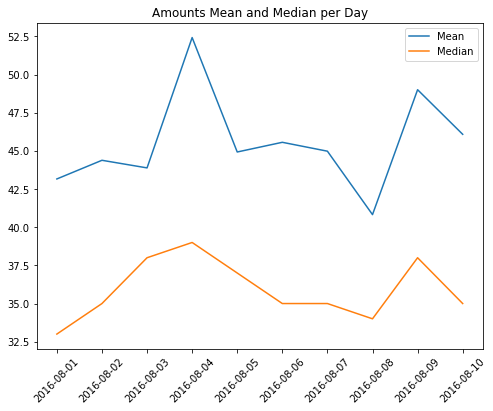

In [150]:
plt.figure(figsize=(8, 6))

plt.plot(day_mean.index.values, day_mean['amounts'].values, label='Mean')
plt.plot(day_median.index.values, day_median['amounts'].values, label='Median')

plt.xticks(label=day_mean.index.values, rotation='45')
plt.title('Amounts Mean and Median per Day')
plt.legend()

plt.show()

4. 计算订单详情表单日销售数量，并绘制点线图，其中横坐标为日期，旋转45度，纵坐标为销量，标题为“日销售量"。

In [140]:
day_sum = order_detail_groups.apply(np.sum)['counts']
day_sum

date
2016-08-01    233
2016-08-02    151
2016-08-03    192
2016-08-04    169
2016-08-05    224
2016-08-06    793
2016-08-07    761
2016-08-08    171
2016-08-09    167
2016-08-10    227
Name: counts, dtype: int64

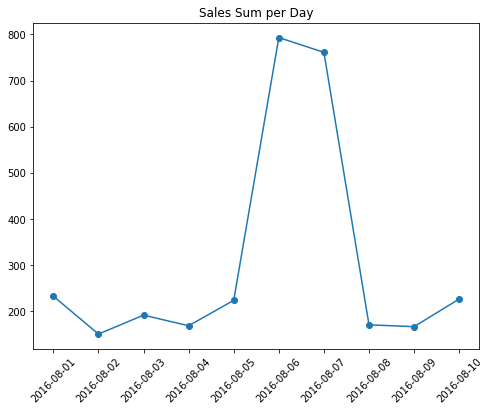

In [149]:
plt.figure(figsize=(8, 6))
x = day_sum.index.values
y = day_sum.values

plt.plot(x, y, 'o-')
plt.title('Sales Sum per Day')
plt.xticks(label=day_sum.index.values, rotation='45')

plt.show()

#### 第7题  （难易程度：**）

对订单详情表进行以下重构操作：

1. 以订单编号（order_id）为行索引键创建订单销量（counts）和销售额（amounts）的透视表，并输出前5行；

In [152]:
# 操作代码
order_detail_pivot = pd.pivot_table(order_details[['order_id', 'counts', 'amounts']], index='order_id')
order_detail_pivot.head()

,amounts,counts
order_id,,
137,32.333333,1.500000
165,52.944444,1.166667
166,48.200000,1.400000
171,36.285714,1.428571
177,34.250000,1.000000


2. 创建使用订单编号（order_id）和菜品名称（dishes_name）作为行索引键创建订单销量（counts）和销售额（amounts）的透视表，输出前5行；

In [153]:
order_detail_pivot2 = pd.pivot_table(order_details[['order_id', 'dishes_name', 'counts', 'amounts']],
                                    index=['order_id', 'dishes_name'], aggfunc='sum')
order_detail_pivot2.head()

amounts  counts
order_id dishes_name                     
137      农夫山泉NFC果汁100%橙汁        6       1
         凉拌菠菜                  27       1
         番茄炖牛腩\r\n             35       1
         白饭/小碗                  1       4
         西瓜胡萝卜沙拉               26       1

3. 创建以订单编号（order_id）为行索引键，菜品名称（dishes_name）作为列索引键的透视表，并将缺失值填充为0，输出前5行4列。

In [158]:
order_detail_pivot3 = pd.pivot_table(order_details[['order_id', 'dishes_name', 'counts', 'amounts']],
                                    index='order_id', columns='dishes_name', aggfunc='sum', fill_value=0)
order_detail_pivot3.iloc[:5,:4]

amounts                        
dishes_name  42度海之蓝  北冰洋汽水  38度剑南春  50度古井贡酒
order_id                                   
137               0       0       0       0
165               0       0      80       0
166               0       0       0       0
171               0       0       0       0
177               0       0       0       0

#### 第8题 （难易程度：**）

对订单详情表进行以下重构操作：

1. 创建单日菜品销售额（amounts）与销量（counts）的交叉表，并输出前5行；

In [160]:
# 操作代码
order_details['place_order_time'] = pd.to_datetime(order_details['place_order_time'])
order_details['date'] = [dt.date() for dt in order_details['place_order_time']]

order_details_pivot4 = pd.pivot_table(order_details[['date', 'dishes_name', 'counts', 'amounts']], 
                                      index='date', aggfunc='sum')
order_details_pivot4.head()

,amounts,counts
date,,
2016-08-01,9366,233
2016-08-02,6125,151
2016-08-03,6890,192
2016-08-04,7549,169
2016-08-05,8671,224


2. 在同一图表上绘制上述单日菜品销售额（蓝）与销量（红）的点线图（趋势图），其中横坐标为日期（共享,标签旋转30度，右对齐），纵坐标分别为成交额和销量，标题为"2016年八月份日销售额和销量"。

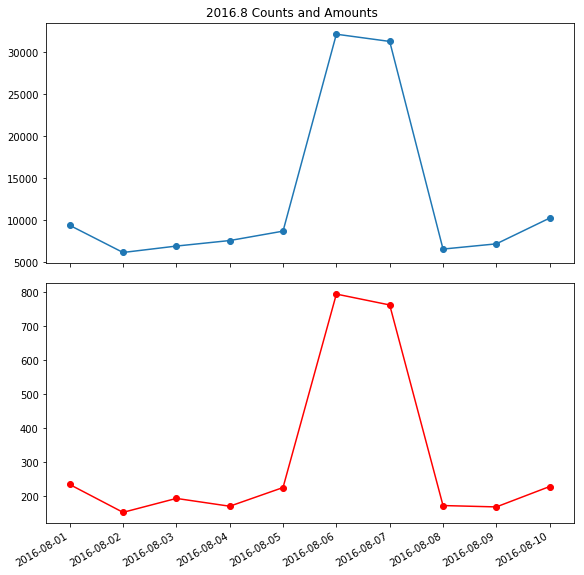

In [210]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8), constrained_layout=True)

ax1.plot(order_details_pivot4['amounts'], 'o-')
ax2.plot(order_details_pivot4['counts'], 'o-', c='red')

plt.setp(ax2.get_xticklabels(), rotation=30, ha="right")
plt.suptitle('2016.8 Counts and Amounts')

plt.show()

3. 创建单个菜品单日销售额的交叉表，包含汇总行和列，并输出后5行5列。

In [216]:
order_details_cross = pd.crosstab(index=order_details['date'], 
                                  columns=order_details['dishes_name'],
                                  values=order_details['amounts'], 
                                  aggfunc='sum',
                                  margins=True)
order_details_cross.iloc[-5:, -5:]

dishes_name,黄尾袋鼠西拉子红葡萄酒,黄油曲奇饼干,黄花菜炒木耳,黑米恋上葡萄,All
date,,,,,
2016-08-07,230.0,32.0,105.0,99.0,31306
2016-08-08,46.0,NaN,NaN,33.0,6532
2016-08-09,138.0,NaN,35.0,99.0,7155
2016-08-10,46.0,NaN,70.0,33.0,10231
All,736.0,80.0,525.0,561.0,125992


#### 第9题 （难易程度：** ）

重新导入订单详情表，然后完成以下操作：

1. 导入订单详情表的其余两个sheet页，然后将其纵向合并为一张表，输出合并前后订单详情表的形状；

In [264]:
# 操作代码
order_detail1 = pd.read_excel('data/meal_order_detail.xlsx')
order_detail2 = pd.read_excel('data/meal_order_detail.xlsx', sheet_name='meal_order_detail2')
order_detail3 = pd.read_excel('data/meal_order_detail.xlsx', sheet_name='meal_order_detail3')

order_details_all = pd.concat([order_detail1, order_detail2, order_detail3])
order_details_all.shape

(10037, 19)

2. 对合并后的订单详情表进行样本（记录）去重和特征去重，并输出去重前后订单详情表的形状；

In [265]:
# 样本去重
print('去重前：', order_details_all.shape)
order_details_all.drop_duplicates(inplace=True)
print('去重后：', order_details_all.shape)

去重前： (10037, 19)
去重后： (10037, 19)


In [266]:
# 特征去重
def feature_equals(df):
    df_equals = pd.DataFrame([], columns=df.columns, index=df.columns)
    for i in df.columns:
        for j in df.columns:
            df_equals.loc[i,j] = df.loc[:, i].equals(df.loc[:,j])
    return df_equals

detail_equals = feature_equals(order_details_all)

# 遍历所有数据
detail_len = detail_equals.shape[0]
dup_cols = []

for k in range(detail_len):
    for l in range(k+1, detail_len):
        if detail_equals.iloc[k, l] & (detail_equals.columns[l] not in dup_cols):
            dup_cols.append(detail_equals.columns[l])

print('去重前：', order_details_all.shape)
order_details_all.drop(dup_cols, axis=1, inplace=True)
print('去重后：', order_details_all.shape)

去重前： (10037, 19)
去重后： (10037, 11)


3. 统计合并后订单详情表各个特征的缺失率（百分比），删除全部数据缺失的列，输出缺失值处理后的缺失数量。

In [267]:
# 统计各个特征的缺失率
na_rate = (order_details_all.isna().sum() / order_details_all.shape[0] * 100).astype('str') + '%'
na_rate

detail_id             0.0%
order_id              0.0%
dishes_id             0.0%
logicprn_name       100.0%
dishes_name           0.0%
itemis_add            0.0%
counts                0.0%
amounts               0.0%
place_order_time      0.0%
picture_file          0.0%
emp_id                0.0%
dtype: object

In [268]:
# 删除全部数据均为缺失的列
order_details_all.dropna(axis=1, how='all', inplace=True)
order_details.isnull().sum()

detail_id           0
order_id            0
dishes_id           0
dishes_name         0
counts              0
amounts             0
place_order_time    0
picture_file        0
emp_id              0
date                0
dtype: int64

#### 第10题 （难易程度：**）

在第9题操作的基础上，完成以下操作：

1. 绘制合并后订单详情表菜品销量（counts）的箱线图，以识别其异常值，要求通过箱线图的异常值标签获取异常值的个数、最大最小值统计信息，然后将这些统计信息作为文本注解添加到图表中，图表标题为"菜品销量箱线图"，图表保存为"details-10.png"文件。

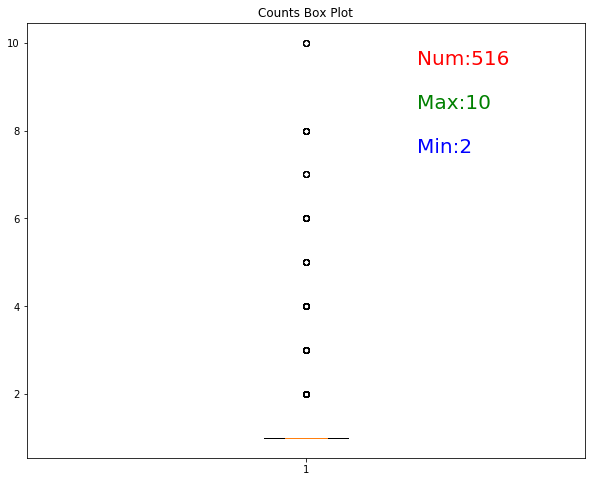

In [269]:
# 操作代码
plt.figure(figsize=(10, 8))
p = plt.boxplot(order_details_all['counts'].values, notch=True)

# 获取异常值统计信息
outliers = p['fliers'][0].get_ydata()
num_outliers = len(outliers)
max_outlier = max(outliers)
min_outlier = min(outliers)

plt.text(1.2, 9.5, 'Num:{}'.format(num_outliers), fontsize=20, color='r')
plt.text(1.2, 8.5, 'Max:{}'.format(max_outlier), fontsize=20, color='g')
plt.text(1.2, 7.5, 'Min:{}'.format(min_outlier), fontsize=20, color='b')
plt.title('Counts Box Plot')

plt.savefig('details-10.png')
plt.show()

2. 通过替换法处理合并后订单详情表的销量（counts）和销售额（amounts）列存在的异常值，并输出替换后销量和销售额的最大最小值。

In [270]:
# 定义异常值识别与处理函数
def proc_outlier(series):
    ql = series.quantile(0.25) # 上四分位
    qu = series.quantile(0.75) # 下四分位
    
    iqr = qu - ql # 四分位数间距
    
    # 异常值定义为小于ql-1.5*iqr或大于qu+1.5*iqr
    series.loc[series > (qu + 1.5 * iqr)] = qu
    series.loc[series < (ql - 1.5 * iqr)] = ql
    
    return series

In [271]:
# 处理销售量和销售额的异常值
print('-'* 10 + '替换前' + '-' * 10)
print('销量最小值：', order_details_all['counts'].min())
print('销量最大值：', order_details_all['counts'].max())
print('售额最小值：', order_details_all['amounts'].min())
print('售额最大值：', order_details_all['amounts'].max())

order_details_all['counts'] = proc_outlier(order_details_all['counts'])
order_details_all['amounts'] = proc_outlier(order_details_all['amounts'])

print('-'* 10 + '替换后' + '-' * 10)
print('销量最小值：', order_details_all['counts'].min())
print('销量最大值：', order_details_all['counts'].max())
print('售额最小值：', order_details_all['amounts'].min())
print('售额最大值：', order_details_all['amounts'].max())

----------替换前----------
销量最小值： 1
销量最大值： 10
售额最小值： 1
售额最大值： 178
----------替换后----------
销量最小值： 1.0
销量最大值： 1.0
售额最小值： 1.0
售额最大值： 99.0


#### 第11题 （难易程度：**）

在第10题操作的基础上，完成以下操作：

1. 订单详情表（合并后）、订单信息表和用户表之间存在关联，请通过主键合并的方式将3张表横向合并为一张宽表

In [277]:
# 操作代码
order_details_all['order_id'] = order_details_all['order_id'].astype('str')
order_details_all['emp_id'] = order_details_all['emp_id'].astype('str')
orders['info_id'] = orders['info_id'].astype('str')
orders['emp_id'] = orders['emp_id'].astype('str')
users['USER_ID'] = users['USER_ID'].astype('str')
order_details_all.dtypes

detail_id                    int64
order_id                    object
dishes_id                    int64
dishes_name                 object
itemis_add                   int64
counts                     float64
amounts                    float64
place_order_time    datetime64[ns]
picture_file                object
emp_id                      object
dtype: object

In [276]:
orders.dtypes

info_id                      object
emp_id                       object
number_consumers              int64
dining_table_id               int64
dining_table_name             int64
expenditure                   int64
dishes_count                  int64
accounts_payable              int64
use_start_time       datetime64[ns]
lock_time            datetime64[ns]
org_id                        int64
order_status                  int64
phone                         int64
name                         object
dtype: object

In [278]:
data_merged = pd.merge(order_details_all, orders, left_on=['order_id', 'emp_id'], right_on=['info_id', 'emp_id'])
data_merged = pd.merge(data_merged, users, left_on='emp_id', right_on='USER_ID', how='inner')
data_merged.shape

(10037, 39)

In [280]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 39 columns):
detail_id            10037 non-null int64
order_id             10037 non-null object
dishes_id            10037 non-null int64
dishes_name          10037 non-null object
itemis_add           10037 non-null int64
counts               10037 non-null float64
amounts              10037 non-null float64
place_order_time     10037 non-null datetime64[ns]
picture_file         10037 non-null object
emp_id               10037 non-null object
info_id              10037 non-null object
number_consumers     10037 non-null int64
dining_table_id      10037 non-null int64
dining_table_name    10037 non-null int64
expenditure          10037 non-null int64
dishes_count         10037 non-null int64
accounts_payable     10037 non-null int64
use_start_time       10037 non-null datetime64[ns]
lock_time            10037 non-null datetime64[ns]
org_id               10037 non-null int64
order_status   

In [282]:
data_merged.head(3).T

,0,1,2
detail_id,2956,2958,2961
order_id,417,417,417
dishes_id,610062,609957,609950
dishes_name,蒜蓉生蚝,蒙古烤羊腿\r\n\r\n\r\n,大蒜苋菜
itemis_add,0,0,0
counts,1,1,1
amounts,49,48,30
place_order_time,2016-08-01 11:05:36,2016-08-01 11:07:07,2016-08-01 11:07:40
picture_file,caipu/104001.jpg,caipu/202003.jpg,caipu/303001.jpg
emp_id,1442,1442,1442


2. 对合并后宽表的进行缺失值可视化检测，若存在缺失值，则进行以下处理：
   - 删除全空列
   - 对于部分为空值的数值型特征列，使用均值填充
   - 对于部分为空值的类别型特征列，使用前向和反向填充

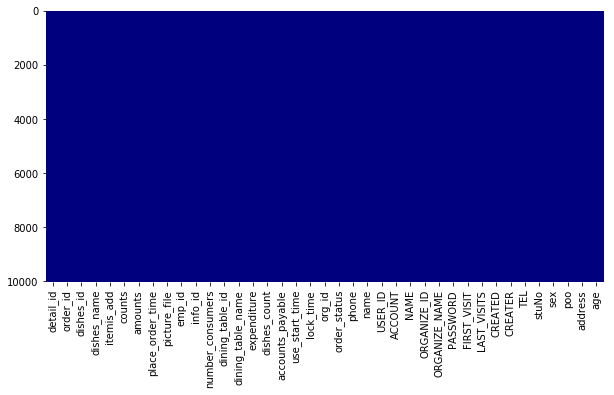

In [286]:
plt.figure(figsize=(10, 5))
plot_heatmap(data_merged.isna(), plt.gca(), cmap='jet')
plt.show()

#### 第12题 （难易程度：** ）

对订单详情表进行以下数据转换和可视化操作：

1. 对菜品名称（dishes_name）特征进行哑变量（one-hot独热编码）处理，输出处理前的菜品名称的前5行和处理后的前5行5列

In [290]:
# 操作代码
dishes_names = order_details.loc[:, 'dishes_name']
print('-'*10 + '处理前' + '-'*10)
dishes_names.iloc[:5]

----------处理前----------


0                 蒜蓉生蚝
1    蒙古烤羊腿\r\n\r\n\r\n
2                 大蒜苋菜
3                芝麻烤紫菜
4                  蒜香包
Name: dishes_name, dtype: category
Categories (154, object): [42度海之蓝, 北冰洋汽水, 38度剑南春, 50度古井贡酒, ..., 黄尾袋鼠西拉子红葡萄酒, 黄油曲奇饼干, 黄花菜炒木耳, 黑米恋上葡萄]

In [291]:
print('-'*10 + '处理后' + '-'*10)
pd.get_dummies(dishes_names).iloc[:5, :5]

----------处理后----------


,42度海之蓝,北冰洋汽水,38度剑南春,50度古井贡酒,52度泸州老窖
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


2. 对菜品销售额（amounts）进行等宽离散化处理，输出5个价格区间（便宜，平价，中等，较贵，很贵）的销售数量。

In [294]:
prices = pd.cut(order_details['amounts'], 5, labels=['PY', 'PJ', 'ZD', 'JG', 'HG'])
prices.value_counts()

PY    1488
PJ     885
ZD     233
HG     130
JG      43
Name: amounts, dtype: int64

3. 绘制上述5个价格区间销量的爆裂式饼图，图表标题为"不同价格区间菜品销量占比"，标签分别为"便宜、平价、中等、较贵、很贵", 颜色分别为“红、橙、黄、绿、蓝”，并以”16.8%"的形式显示每个价格区间销量的百分比。

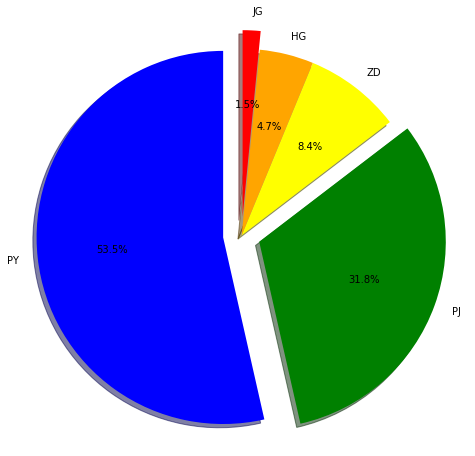

In [316]:
plt.figure(figsize=(8,8))
# 爆裂指数
explode=[0.1, 0.1, 0, 0, 0.1]
colors=['red','orange', 'yellow', 'green', 'blue']

plt.pie(prices.value_counts(), 
        explode=explode, 
        labels=prices.value_counts().index,
        colors=colors[::-1],
        autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')
plt.show()